## Задание 1 (5 баллов)


1. Для каждого признака подпишите, является он категориальным, порядковым или количественным.
2. Выведите основные статистики для каждого из признаков: среднее, мода, дисперсия, максимум, минимум (там, где это осмысленно делать). Есть ли признаки, которые вы бы стали логарифмировать, почему?
3. Найдите пропуски и дубликаты в данных, устраните их, напишите, почему вы решили именно так устранить пропуски
4. Для каждого признака постройте гистограммы частот его значений.
5. Посмотрите на зависимости пар признаков, есть ли зависимые, какие?
5. Какие признаки можно удалить и почему?

In [299]:
import pandas as pd
import numpy as np
import pandas_profiling as prof
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline


In [300]:
# считаем данные и посмотрим на случайные строчки
df = pd.read_csv('titanic_.csv', index_col=0)
df.sample(10)

Survived  Pclass                                      Name     Sex   Age  \
657         1       1              Dr. Henry William Frauenthal    male  50.0   
759         1       1  Mrs. William Ernest (Lucile Polk) Carter  female  36.0   
823         1       2                      Master. Andre Mallet    male   1.0   
832         0       3                           Mr. Jakob Pasic    male  21.0   
214         1       1                    Miss. Madeleine Newell  female  31.0   
195         0       3                        Mr. Robert Mernagh    male  28.0   
49          0       3                 Master. Juha Niilo Panula    male   7.0   
674         1       3                    Miss. Anna Sofia Turja  female  18.0   
55          1       2                          Miss. Emily Rugg  female  21.0   
882         0       2                      Rev. Juozas Montvila    male  27.0   

     Siblings/Spouses Aboard  Parents/Children Aboard      Fare  
657                        2                        0  133.6500  
759                        1                        2  120.0000  
823                        0                        2   37.0042  
832                        0                        0    8.6625  
214                        1                        0  113.2750  
195                        0                        0    7.7500  
49                         4                        1   39.6875  
674                        0                        0    9.8417  
55                         0                        0   10.5000  
882                        0                        0   13.0000

In [301]:
# посмотрим, какие типы у данных
df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

## 1.1 Типы признаков:

1. Unnamed: 0 - порядковый (просто нумерация строк в дата сете, наверно можно выкинуть)
2. Survived - категориальный (0 - не выжил, 1 - выжил)
3. Pclass     - порядковый (1 > 2 > 3 класс, но разницу считать не можем)
4. Name       - категориальный
5. Sex        - категориальный
6. Age        - количественный, дискретный
7. Siblings/Spouses Aboard - количественный, дискретный (сколько на борту братьев или сестер/супругов)
8. Parents/Children Aboard - количественный, дискретный (родители/дети на борту)
9. Fare       - количественный, непрерывный (плата за проезд)

In [302]:
# считаем количество уникальльных значений у каждой фичи
print(df.shape)
for feature in all_names:
    print(feature.ljust(27), df[feature].nunique())


(887, 8)
Survived                    2
Pclass                      3
Name                        885
Sex                         2
Age                         89
Siblings/Spouses Aboard     8
Parents/Children Aboard     7
Fare                        248


Заметим, что у нас не хватает 2 имен

## 1.3 Пропуски и дубликаты

In [303]:
# напечатаем все строки с пропусками
df[df.isnull().any(axis=1)]

Survived  Pclass Name   Sex   Age  Siblings/Spouses Aboard  \
101         0       1  NaN  male  21.0                        0   
762         0       1  NaN  male  46.0                        0   

     Parents/Children Aboard     Fare  
101                        1  77.2875  
762                        0  39.6000

Как раз нашли нехватающие имена

In [304]:
# оставим только строки без пропусков, их все равно очень мало
df = df[~df.isnull().any(axis=1)]
# проверим, что в действительно не осталось NA
df.isnull().sum().sum()

0

In [305]:
# найдем все строки с дубликатами

df[df.duplicated()]

Empty DataFrame
Columns: [Survived, Pclass, Name, Sex, Age, Siblings/Spouses Aboard, Parents/Children Aboard, Fare]
Index: []

Тут все окей

Возможно, есть еще всякие разные странные значения в данных, будем их отлавливать при нахождении статистик

### 1.2 Статистики

In [306]:
# сохраним названия фичей в отдельные листы
all_names = list(df.columns.values)
cat_names = ["Survived", "Name", "Sex"]
order_names = ["Pclass"]
count_names = ["Age", "Fare", "Siblings/Spouses Aboard", "Parents/Children Aboard"]

Будем игнорировать Name, потому что там нет ничего интересного - просто имена

In [307]:
print('feature:'.ljust(27), 'figure:', '\n')


print("mode:", '\n')
for feature in df.columns.drop('Name'):
    print(feature.ljust(27), df[feature].mode()[0])
print()
    
print("mean:", '\n')    
for feature in count_names:
    print(feature.ljust(27), df[feature].mean())
print()
    
print("variance (dipersion):", '\n')    
for feature in count_names:
    print(feature.ljust(27), df[feature].var())
print()

print("max:", '\n')    
for feature in count_names:
    print(feature.ljust(27), df[feature].max())
print()

print("min:", '\n')    
for feature in count_names:
    print(feature.ljust(27), df[feature].min())

feature:                    figure: 

mode: 

Survived                    0
Pclass                      3
Sex                         male
Age                         22.0
Siblings/Spouses Aboard     0
Parents/Children Aboard     0
Fare                        8.05

mean: 

Age                         29.462338983050845
Fare                        32.24635050847454
Siblings/Spouses Aboard     0.5163841807909605
Parents/Children Aboard     0.38305084745762713

variance (dipersion): 

Age                         199.48918468134042
Fare                        2481.505863970198
Siblings/Spouses Aboard     1.2319145128716324
Parents/Children Aboard     0.652879822072247

max: 

Age                         80.0
Fare                        512.3292
Siblings/Spouses Aboard     8
Parents/Children Aboard     6

min: 

Age                         0.42
Fare                        0.0
Siblings/Spouses Aboard     -1
Parents/Children Aboard     0


Видно что тут почему-то есть люди, у которых Siblings/Spouses Aboard отрицательное количество.\
А еще тут есть люди, у которых Fare = 0.

In [308]:
print(df[df['Siblings/Spouses Aboard']<0].shape)
df[df['Siblings/Spouses Aboard']<0]

(5, 8)


Survived  Pclass                      Name     Sex   Age  \
98          0       2          Mr. Sinai Kantor    male  34.0   
128         0       3         Mr. Johan Ekstrom    male  45.0   
366         1       3        Miss. Annie Jermyn  female  22.0   
432         1       1  Miss. Lucile Polk Carter  female  14.0   
562         0       3       Mr. Alfred J Davies    male  24.0   

     Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
98                        -1                        0   26.000  
128                       -1                        0    6.975  
366                       -1                        0    7.750  
432                       -1                        2  120.000  
562                       -1                        0   24.150

Вероятно, для этих людей просто нет этой информации и поэтому поставили -1. Их можно тоже удалить

In [309]:
df.drop(df[df['Siblings/Spouses Aboard']<0].index, inplace=True)

Еще есть люди, которые катались на лайнере бесплатно:

In [310]:
print(df[df['Fare']==0].shape)
df[df['Fare']==0]

(15, 8)


Survived  Pclass                            Name   Sex   Age  \
178         0       3              Mr. Lionel Leonard  male  36.0   
261         0       1            Mr. William Harrison  male  40.0   
269         1       3     Mr. William Henry Tornquist  male  25.0   
275         0       2              Mr. Francis Parkes  male  21.0   
300         0       3  Mr. William Cahoone Jr Johnson  male  19.0   
411         0       2   Mr. Alfred Fleming Cunningham  male  22.0   
463         0       2            Mr. William Campbell  male  21.0   
478         0       2          Mr. Anthony Wood Frost  male  37.0   
594         0       3              Mr. Alfred Johnson  male  49.0   
630         0       1    Mr. William Henry Marsh Parr  male  30.0   
671         0       2       Mr. Ennis Hastings Watson  male  19.0   
728         0       2             Mr. Robert J Knight  male  41.0   
802         0       1           Mr. Thomas Jr Andrews  male  39.0   
811         0       1                 Mr. Richard Fry  male  39.0   
818         0       1  Jonkheer. John George Reuchlin  male  38.0   

     Siblings/Spouses Aboard  Parents/Children Aboard  Fare  
178                        0                        0   0.0  
261                        0                        0   0.0  
269                        0                        0   0.0  
275                        0                        0   0.0  
300                        0                        0   0.0  
411                        0                        0   0.0  
463                        0                        0   0.0  
478                        0                        0   0.0  
594                        0                        0   0.0  
630                        0                        0   0.0  
671                        0                        0   0.0  
728                        0                        0   0.0  
802                        0                        0   0.0  
811                        0                        0   0.0  
818                        0                        0   0.0

Думаю, они никому не мешают.
Посчитаем все значения еще раз

In [311]:
print('feature:'.ljust(27), 'figure:', '\n')


print("mode:", '\n')
for feature in df.columns.drop('Name'):
    print(feature.ljust(27), df[feature].mode()[0])
print()
    
print("mean:", '\n')    
for feature in count_names:
    print(feature.ljust(27), df[feature].mean())
print()
    
print("variance (dipersion):", '\n')    
for feature in count_names:
    print(feature.ljust(27), df[feature].var())
print()

print("max:", '\n')    
for feature in count_names:
    print(feature.ljust(27), df[feature].max())
print()

print("min:", '\n')    
for feature in count_names:
    print(feature.ljust(27), df[feature].min())

feature:                    figure: 

mode: 

Survived                    0
Pclass                      3
Sex                         male
Age                         22.0
Siblings/Spouses Aboard     0
Parents/Children Aboard     0
Fare                        8.05

mean: 

Age                         29.47178409090909
Fare                        32.21948318181814
Siblings/Spouses Aboard     0.525
Parents/Children Aboard     0.38295454545454544

variance (dipersion): 

Age                         199.95647770077045
Fare                        2485.3317012386
Siblings/Spouses Aboard     1.2257679180887358
Parents/Children Aboard     0.6529514427552009

max: 

Age                         80.0
Fare                        512.3292
Siblings/Spouses Aboard     8
Parents/Children Aboard     6

min: 

Age                         0.42
Fare                        0.0
Siblings/Spouses Aboard     0
Parents/Children Aboard     0


## 1.4 Гистограммы

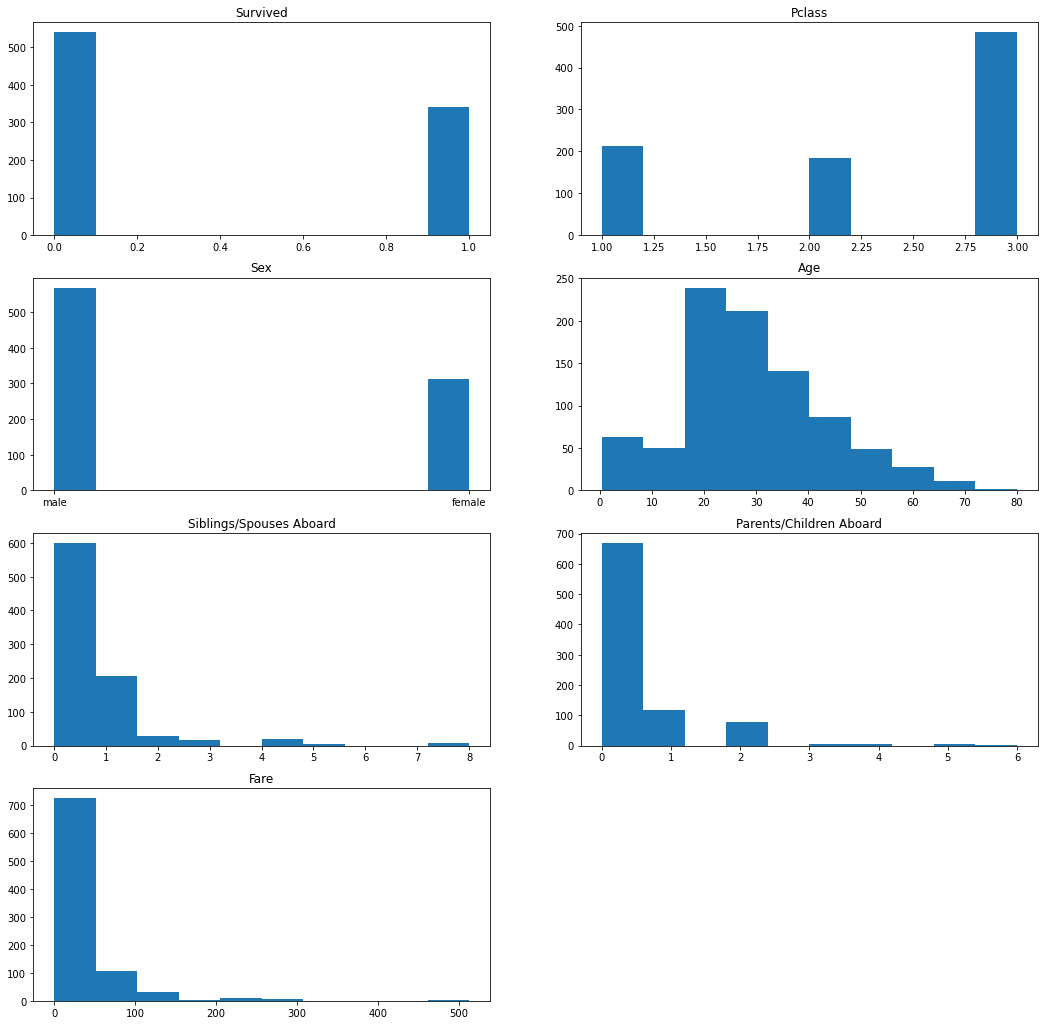

In [312]:
plt.figure(figsize=(18, 18))
for i, col in enumerate(df.columns.drop('Name')): 
    plt.subplot(4, 2, i+1)
    plt.hist(df[col])
    plt.title(label=col)

## 1.5 Зависимости

Можно посмотреть корреляции в ProfileReport

In [313]:
prof.ProfileReport(df, title="Pandas Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

* Самая сильная корреляция (-0.54) - между Pclass и Fare. Это логично, потому что чем лучше класс билета, тем большую цену придется заплатить 
* Так же есть небольшая (0,41) корреляция между Siblings/Spouses Aboard и Parents/Children Aboard. Скорее всего, это связано с тем, что если люди ехали с кем-то из родственников, то были большой семьей
* Есть более слабая (-0.39) корреляция между Pclass и Age. Получается, что было много молодых пассажиров в дорогом классе
* Еще есть небольшая (-0.34) корреляция между выживаемостью и классом билетов - видимо, в первую очередь старались спасти богатых пассажиров, которые покупали дорогие билеты
* Я не знаю, как найти эти цифры, но еще есть сильная корреляция между Sex и Survived, но в Alerts об этом есть. Это должно быть логично, потому что в первую очередь спасали женщин.

Можно удалить признак Name, потому что, по сути, он никакой статичтической информации не несет. Так же можно удалить один из сильно коррелирующих признаков, например, Pclass или Fare. Если так сделать, то когда в дальнейшем можно будет применять методы машинного обучения, будет удобнее обучаться без сильно коррелирующий признаков.

In [314]:
print(df.corr())

                         Survived    Pclass       Age  \
Survived                 1.000000 -0.340164 -0.056268   
Pclass                  -0.340164  1.000000 -0.395624   
Age                     -0.056268 -0.395624  1.000000   
Siblings/Spouses Aboard -0.036910  0.084527 -0.297394   
Parents/Children Aboard  0.077434  0.025647 -0.190971   
Fare                     0.256162 -0.547249  0.115835   

                         Siblings/Spouses Aboard  Parents/Children Aboard  \
Survived                               -0.036910                 0.077434   
Pclass                                  0.084527                 0.025647   
Age                                    -0.297394                -0.190971   
Siblings/Spouses Aboard                 1.000000                 0.415924   
Parents/Children Aboard                 0.415924                 1.000000   
Fare                                    0.158996                 0.211313   

                             Fare  
Survived                

## Задание 2 (3 балла)

На примере нормального р-я, равномерного р-я и р-я Лапласа покажите, как от величины коэффициента эксцесса зависит вероятность попадания в "хвост". 

1. Постройте графики плотностей распределений (друг на друге)
2. Посчитайте коэффициенты эксцесса для этих распределений 
3. Сравните вероятности попадания в "хвост" для этих распределений (подсказка, это проще всего сделать с помощью функции распределения)

### Дополнительное задание (3 балла)
Найдите и докажите верхнюю и нижнюю границы коэффициента эксцесса

In [315]:
import pandas as pd
import seaborn as sns
import numpy as np

In [316]:
import scipy.stats as st

In [317]:
x = [i/100 - 3 for i in range(600)]
norm_d = [st.norm.pdf(i) for i in x]
lapl_d = [st.laplace.pdf(i, scale=1/np.sqrt(2)) for i in x]
unif_d = [st.uniform.pdf(i, loc = -np.sqrt(12)/2, scale = np.sqrt(12)) for i in x]

<AxesSubplot:>

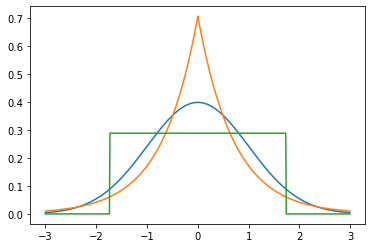

In [318]:
sns.lineplot(x = x, y = norm_d)
sns.lineplot(x = x, y = lapl_d)
sns.lineplot(x = x, y = unif_d)

In [319]:
st.laplace.stats(moments='mvsk', scale=1/np.sqrt(2))

(array(0.), array(1.), array(0.), array(3.))

Чтобы посчитать коэффициенты эксцесса, необходимо достать четвертый и второй центральные моменты, разделить первый на другой в квадрате и вычесть 3, но если я правильно понимаю, в stats уже вычитается 3, так что надо просто разделить одно на другое


In [323]:
m1 = st.laplace.stats(moments='mvsk', scale=1/np.sqrt(2))
m2 = st.norm.stats(moments='mvsk')
m3 = st.uniform.stats(moments='mvsk', loc = -np.sqrt(12)/2, scale = np.sqrt(12))

gamma_l = m1[3]/m1[1]**2
gamma_n = m2[3]/m2[1]**2
gamma_u = m3[3]/m3[1]**2

print("normal:  ", gamma_n)
print("laplace:", gamma_l)
print("uniform:", gamma_u)

normal:   0.0
laplace: 3.0000000000000013
uniform: -1.2000000000000002


Подвинем пределы немного построения графиков левее, чтобы увидеть хвосты.

In [324]:
x = [i/100 - 6 for i in range(300)]

norm_d = [st.norm.cdf(i) for i in x]
lapl_d = [st.laplace.cdf(i, scale=1/np.sqrt(2)) for i in x]
unif_d = [st.uniform.cdf(i, loc = -np.sqrt(12)/2, scale = np.sqrt(12)) for i in x]

/home/timurezer/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/timurezer/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/home/timurezer/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warn

<AxesSubplot:>

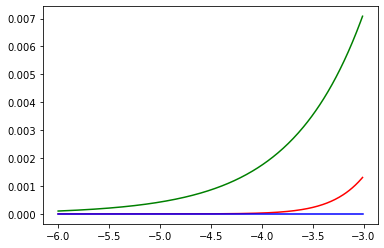

In [325]:
sns.lineplot(x, norm_d, color='r')
sns.lineplot(x, lapl_d, color='g')
sns.lineplot(x, unif_d, color='b')

Видно, что у быстрее всего растет распределение Лапласа, потом нормальное и равномерное. Соответсвуенно, вероятность попасть в хвост большее всего у Лапласа, потом у нормального. Это согласуется со значениями коэффициента эксцесса.
